In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import rasterio
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import LinearSegmentedColormap
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore", category=UserWarning)

In [15]:
pt = pd.read_csv("data/PresentTopSoil.csv")
ps = pd.read_csv("data/PresentSubSoil.csv")

In [17]:
biomass_agb = pd.read_csv("geodata/biomass_agb.csv")
biomass_nd = pd.read_csv("geodata/biomass_ndvi.csv")
hydro_veg = pd.read_csv("geodata/Hydro_Veg.csv")
indices = pd.read_csv("geodata/indices_1985_2025.csv")
lulc = pd.read_csv("geodata/LULCAreaCover.csv")
ndvic = pd.read_csv("geodata/ndvi_changes.csv")

In [18]:
biomass_agb.head(), biomass_nd.head()

(   Unnamed: 0  year  mean_agb_Mg_per_ha  total_agb_Mg
 0           0  1985                 NaN           NaN
 1           1  1986                 NaN           NaN
 2           2  1987                 NaN           NaN
 3           3  1988                 NaN           NaN
 4           4  1989                 NaN           NaN,
    Unnamed: 0  year  mean_ndvi  biomass_t_ha_yr
 0           0  1985        NaN              NaN
 1           1  1986        NaN              NaN
 2           2  1987        NaN              NaN
 3           3  1988   0.097779         0.385825
 4           4  1989   0.119175         0.333500)

<Axes: xlabel='year'>

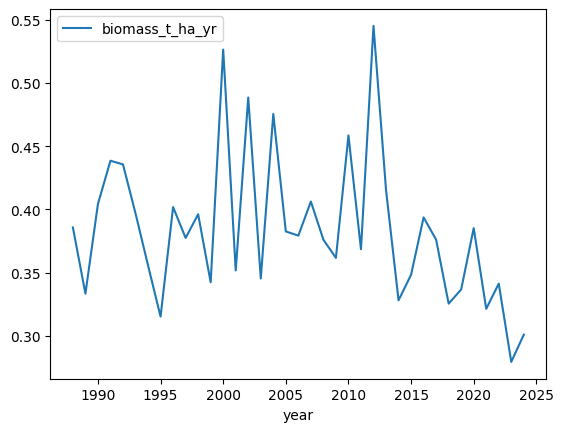

In [22]:
biomass_nd.plot(x = "year", y = "biomass_t_ha_yr")

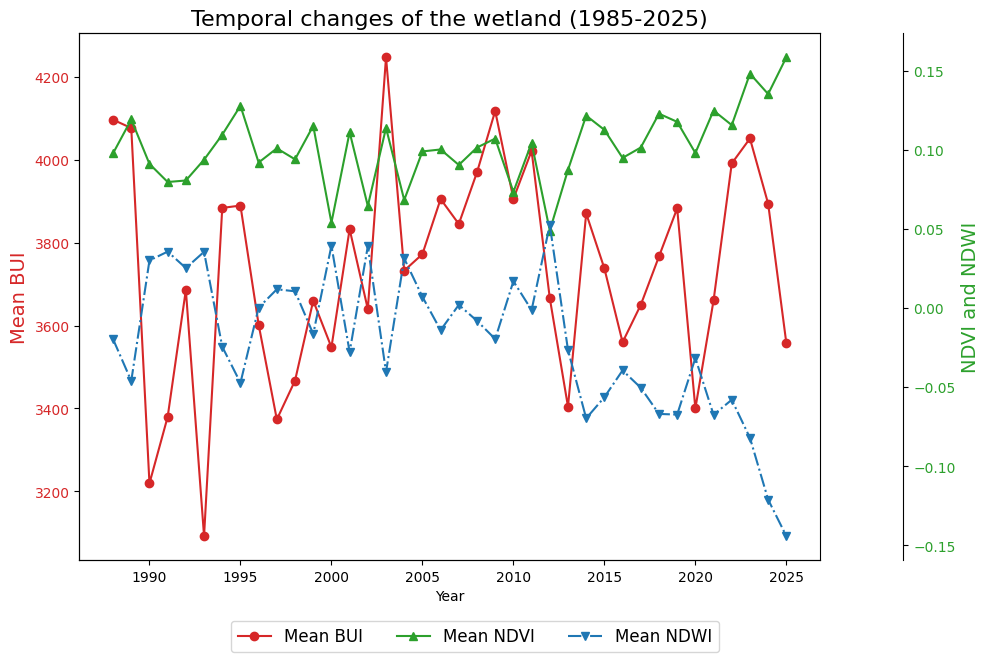

In [28]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color_bui = 'tab:red'
color_lst = 'tab:red'

df = indices.copy()

ax1.set_xlabel('Year', fontsize=10)
ax1.set_ylabel('Mean BUI', color=color_bui, fontsize=14)
ax1.plot(df['year'], df['mean_bui'], color=color_bui, marker='o', label='Mean BUI')
ax1.tick_params(axis='y', labelcolor=color_bui)

ax2 = ax1.twinx()
ax2.spines['right'].set_position(('outward', 60))  # Offset third axis
ax2.set_ylabel('NDVI and NDWI', color='tab:green', fontsize=14)
ax2.plot(df['year'], df['mean_ndvi'], color='tab:green', marker='^', label='Mean NDVI')
ax2.plot(df['year'], df['mean_ndwi'], color='tab:blue', marker='v', label='Mean NDWI', linestyle='-.')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.48, 0.01), ncol=4, fontsize=12)
plt.title('Temporal changes of the wetland (1985-2025)', fontsize=16)

plt.savefig("Figure/1985_2025_ChangesIndices.png", dpi=500)
plt.show()

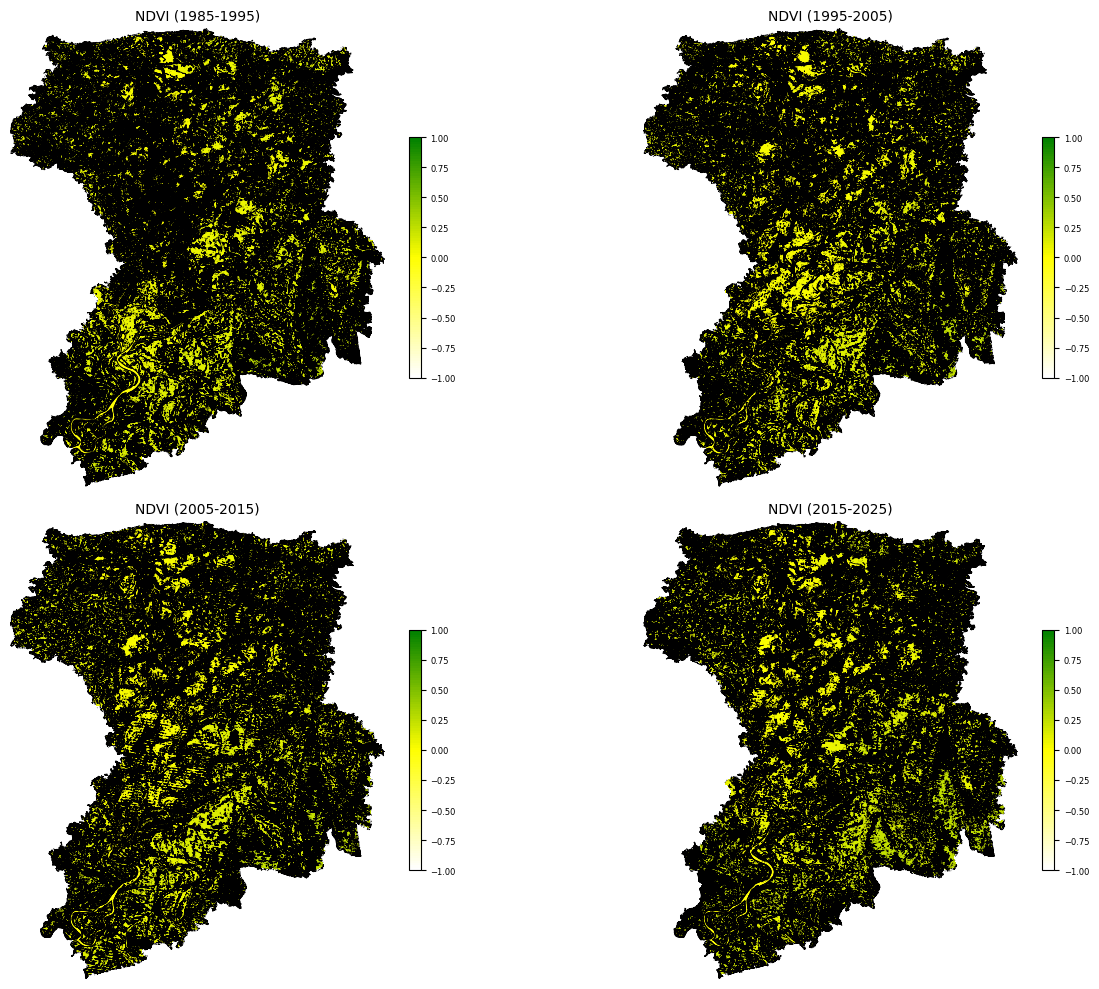

In [6]:
ndvi_files = [
    'gis/NDVI_1985-1995.tif',
    'gis/NDVI_1996-2005.tif',
    'gis/NDVI_2006-2015.tif',
    'gis/NDVI_2016-2025.tif'
]

colors = ["white", "yellow", "green"]

n_bins = 100
cmap = LinearSegmentedColormap.from_list("WhiteYellowGreen", colors, N=n_bins)

years = ["1985-1995","1995-2005","2005-2015","2015-2025"]

plt.figure(figsize=(15, 10))

for i, ndvi_file in enumerate(ndvi_files):
    with rasterio.open(ndvi_file) as src:
        ndvi_data = src.read(1)
        
    ndvi_data = np.ma.masked_equal(ndvi_data, 0)
    ax = plt.subplot(2, 2, i+1)
    img = ax.imshow(ndvi_data, cmap=cmap, vmin=-1, vmax=1)
    ax.set_title(f'NDVI ({years[i]})', fontsize=10)
    ax.contour(ndvi_data, colors='black', linewidths=0.5)
    ax.set_axis_off()
    cbar = plt.colorbar(img, ax=ax, fraction=0.015, pad=0.03)
    cbar.ax.tick_params(labelsize=6)

plt.tight_layout()
plt.savefig("Figure/NDVIChanges.png", dpi=500)
plt.show()

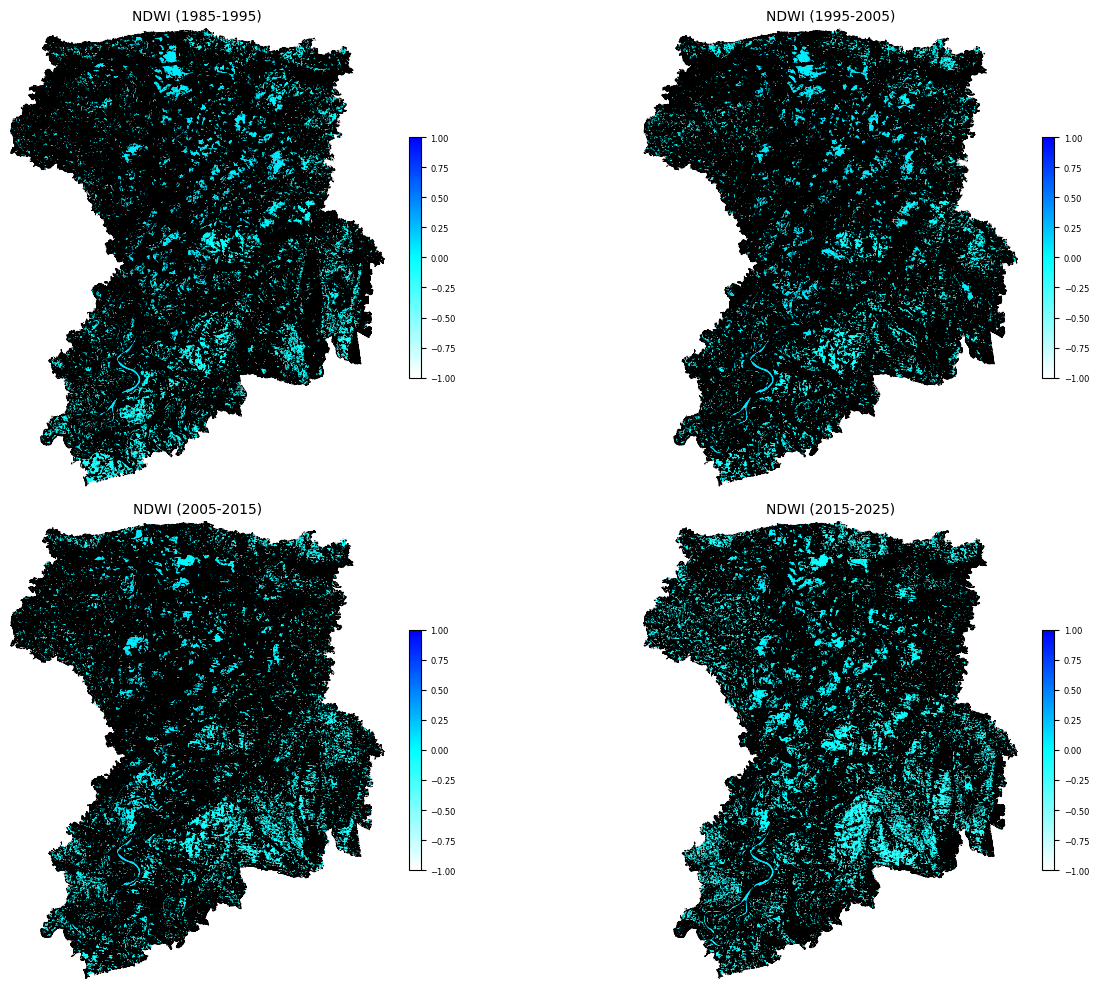

In [8]:
ndvi_files = [
    'gis/NDWI_1985-1995.tif',
    'gis/NDWI_1996-2005.tif',
    'gis/NDWI_2006-2015.tif',
    'gis/NDWI_2016-2025.tif'
]

colors = ["white", "cyan", "blue"]
n_bins = 100
cmap = LinearSegmentedColormap.from_list("WhiteCyanBlue", colors, N=n_bins)

years = ["1985-1995","1995-2005","2005-2015","2015-2025"]
plt.figure(figsize=(15, 10))
for i, ndvi_file in enumerate(ndvi_files):
    with rasterio.open(ndvi_file) as src:
        ndvi_data = src.read(1)
        
    ndvi_data = np.ma.masked_equal(ndvi_data, 0)

    ax = plt.subplot(2, 2, i+1)
    img = ax.imshow(ndvi_data, cmap=cmap, vmin=-1, vmax=1)
    ax.set_title(f'NDWI ({years[i]})', fontsize=10)
    
    ax.contour(ndvi_data, colors='black', linewidths=0.5)
    ax.set_axis_off()

    cbar = plt.colorbar(img, ax=ax, fraction=0.015, pad=0.03)
    cbar.ax.tick_params(labelsize=6)
    
plt.tight_layout()
plt.savefig("Figure/NDWIChanges.png", dpi=500)
plt.show()

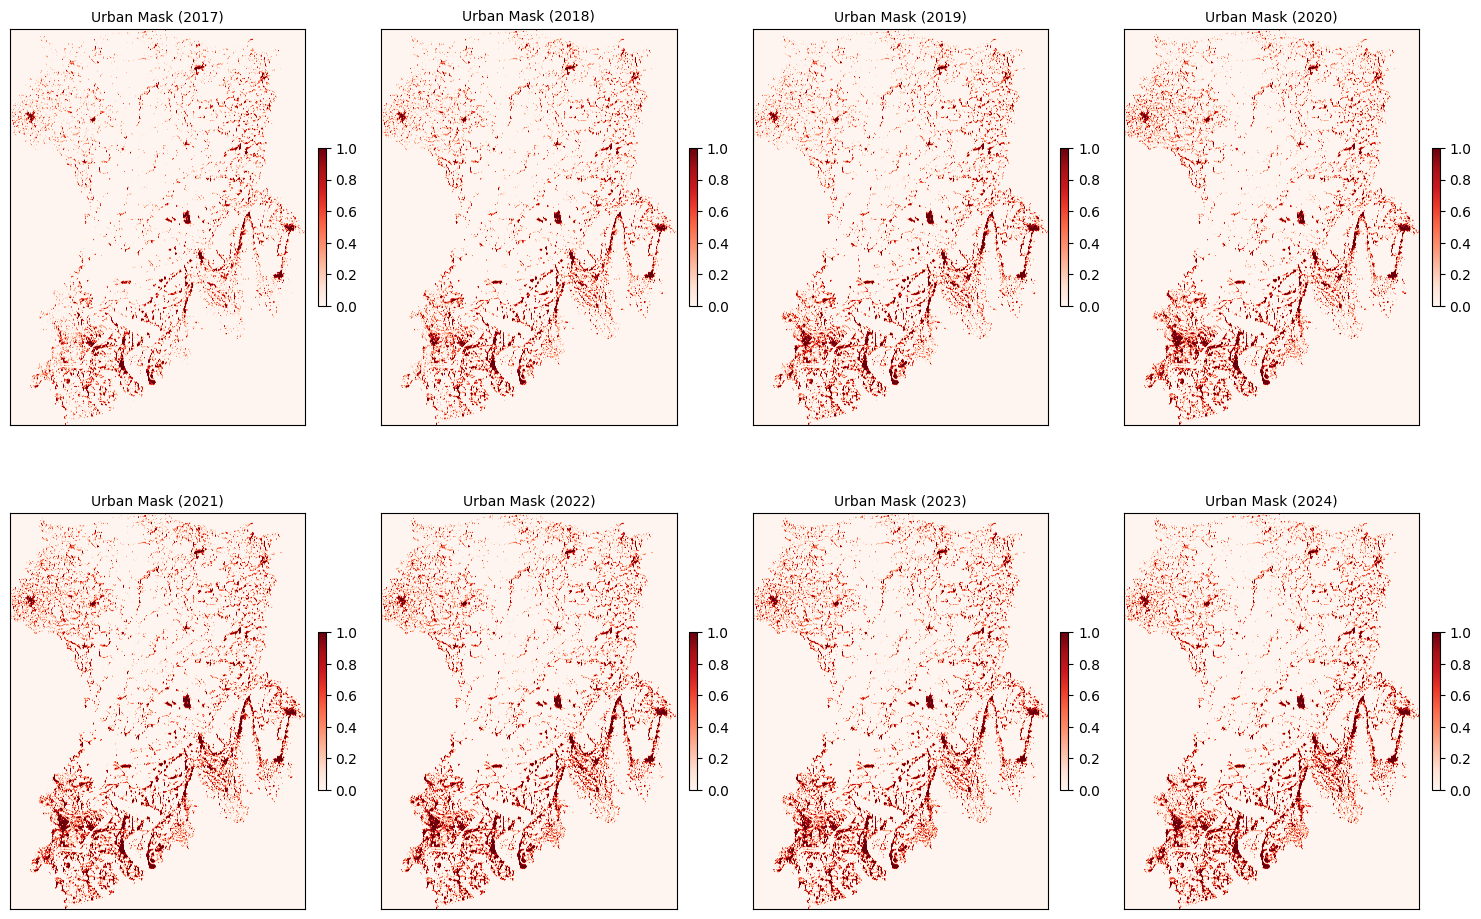

In [13]:
lulc_files = [
    'gis/LULC2017c.tif',
    'gis/LULC2018c.tif',
    'gis/LULC2019c.tif',
    'gis/LULC2020c.tif',        
    'gis/LULC2021c.tif',    
    'gis/LULC2022c.tif',
    'gis/LULC2023c.tif',
    'gis/LULC2024c.tif',
]

WATER_CLASS = 1
VEGETATION_CLASS = 2
FLOODED_CLASS = 9
FLOOD_CLASS = 4
URBAN_CLASS = 7

plt.figure(figsize=(15, 10))

for i, lulc_file in enumerate(lulc_files):
    with rasterio.open(lulc_file) as src:
        lulc_data = src.read(1)  
        
    urban_mask = (lulc_data == URBAN_CLASS)
    
    ax = plt.subplot(2, 4, i+1)  # 2 rows, 4 columns, each subplot
    img = ax.imshow(urban_mask, cmap='Reds')
    ax.set_title(f'Urban Mask ({2017 + i})', fontsize=10)
    
    ax.set_xticks([])
    ax.set_yticks([])

    plt.colorbar(img, ax=ax, fraction=0.025, pad=0.04)

plt.tight_layout()
plt.savefig("Figure/Hydro_Urban.png", dpi=500)
plt.show()

In [44]:
stock = pt.Stock + ps.Stock
stock.index = pt.Location
stock

Location
Ajmiriganj    702.24
Balaganj      297.42
Goainghat     299.30
Hakaluki      218.28
Kanairghat    302.92
Phagu         196.68
Sarail        192.50
Sulla         450.06
Terchibari    257.66
Name: Stock, dtype: float64

In [62]:
df = df25.copy()

features = df.drop(columns='Stock')
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loadings_df = pd.DataFrame(loadings, index=features.columns, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])
print("PCA Loadings:\n", loadings_df)

PCA Loadings:
                                   PC1       PC2
Water Area Change (m²)       0.723329 -0.173338
Flood Area Change (m²)       0.426687  0.013525
Urban Area Change (m²)       0.836305 -0.260917
Vegetation Area Change (m²) -0.087001  0.798647
SOC%_2025                   -0.368086 -0.860072
pH_2025                      0.837895  0.470879
TN_2025                     -0.160376 -0.992185
SBD_2025                    -0.600548  0.200734
CEC_2025                     1.016864 -0.157205
Clay_2025                    0.937974 -0.194617


In [63]:
pca.explained_variance_ratio_

array([0.40444296, 0.24754743])

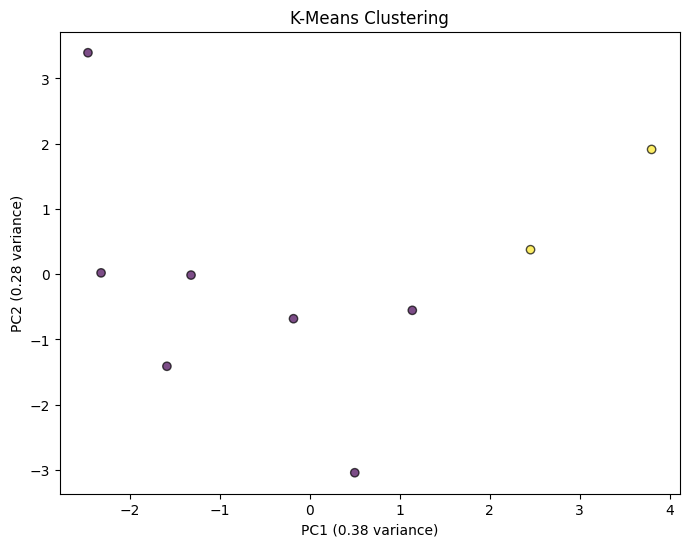

In [73]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2f} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2f} variance)')
plt.grid(False)
plt.show()

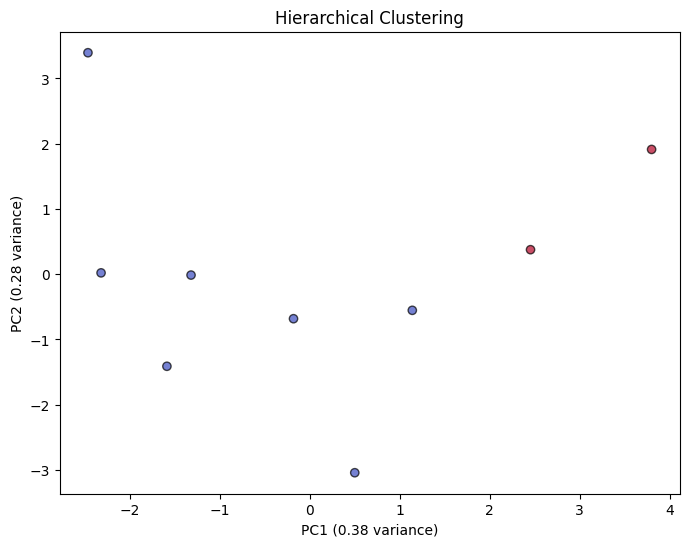

In [72]:
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(pca_result)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=hierarchical_labels, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title('Hierarchical Clustering')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2f} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2f} variance)')
plt.grid(False)
plt.show()

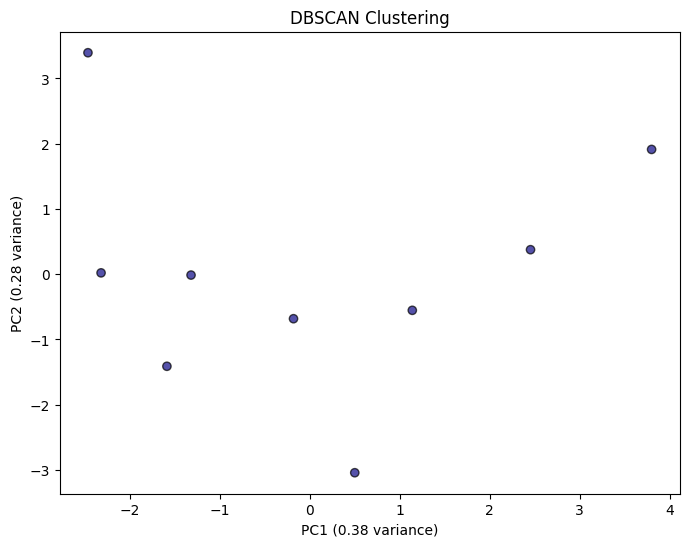

Silhouette Score for K-Means: 0.3785980121054481
Silhouette Score for Hierarchical: 0.3158913948359037


In [71]:
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(pca_result)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=dbscan_labels, cmap='plasma', edgecolor='k', alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2f} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2f} variance)')
plt.grid(False)
plt.show()

print("Silhouette Score for K-Means:", silhouette_score(pca_result, kmeans_labels))
print("Silhouette Score for Hierarchical:", silhouette_score(pca_result, hierarchical_labels))

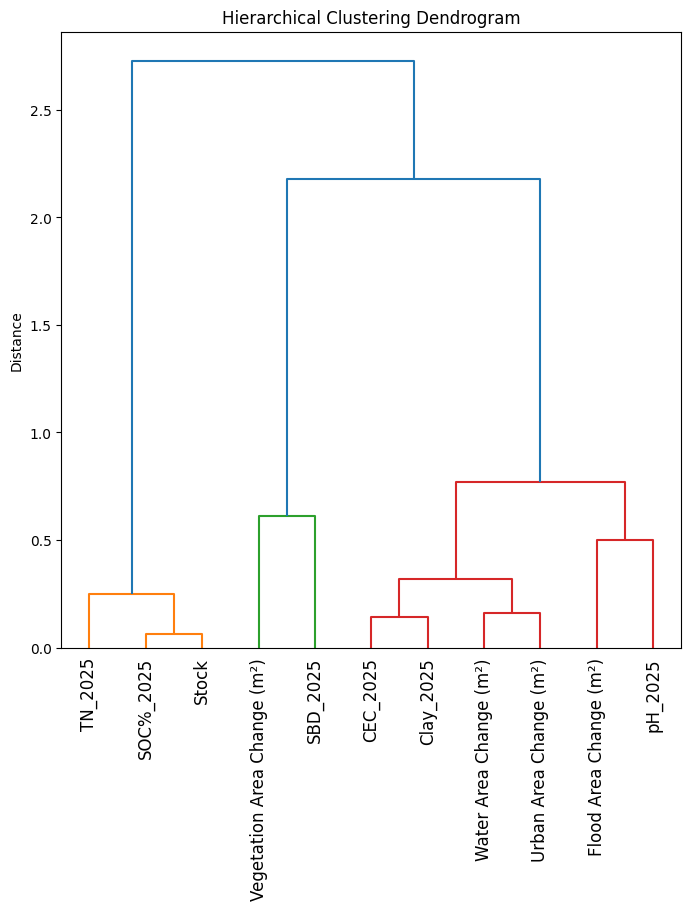

In [81]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(loadings, method='ward')

plt.figure(figsize=(8, 8))
dendrogram(Z, labels=features.columns, orientation='top', leaf_rotation=90, leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('')
plt.ylabel('Distance')
plt.show()

# Regression